<a href="https://colab.research.google.com/github/ferdcoz/mcd-ast/blob/original/AST_Clase_1_ejercicio_asincronico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>



<p> <em> En el desarrollo de la siguiente actividad, se les requerirá llevar a cabo ejercicios prácticos y responder preguntas teóricas, las cuales serán abordadas en los espacios asignados para ello.</em> </p>
<b><font size="5"> El ejercicio finaliza con la leyenda "FIN DEL EJERCICIO ASINCRONICO" </b>

In [3]:
# De ser necesario, instalar librerias
# Ejemplo =
#!pip install yfinance

In [1]:
#Importamos librerias
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# En el ejemplo en cuestion, analizamos el intervalo de tiempo que va entre
comienzo_fecha = '2020-01-02'

# y la siguiente fecha
fin_fecha = '2022-01-01'

In [3]:
# Obtenga datos cercanos de Yahoo Finance para la empresa Alphabet Inc. (GOOG)
ticker_list = ['GOOG']
data = yf.download(ticker_list, start=comienzo_fecha, end=fin_fecha)[['Close']]

# Primera aproximacion a los datos
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003


In [4]:
# Mas informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   505 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


**EJERCICIO 1=**

Realice una descomposición de la serie en sus componentes y proporcione una breve interpretación de los gráficos obtenidos.

In [5]:
# ESPACIO PARA CODIGO DE DESCOMPOSICION DE LA SERIE =
from statsmodels.tsa.seasonal import seasonal_decompose

Establezco la frecuencia del dataset siendo b: dias laborales

In [6]:
data = data.asfreq('b')

Verifico los NAs

In [7]:
data.isna().sum()

Close    17
dtype: int64

Reemplazo los NAs por la media

In [8]:
data.fillna(data.mean(), inplace=True)

In [10]:
plt.rcParams['figure.figsize']=[12.0,8.0]

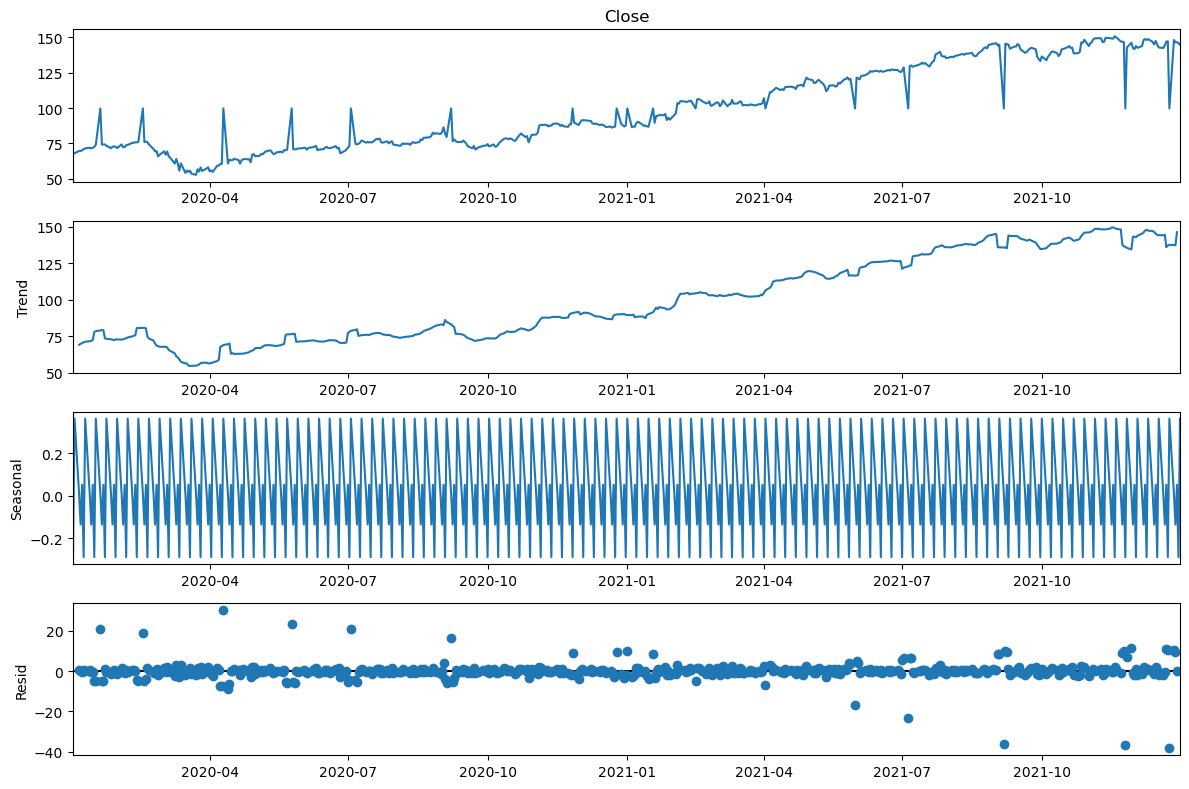

In [11]:
#Aditiva
s_dec_additive = seasonal_decompose(data.Close, model = "adittive")
s_dec_additive.plot()
plt.show()

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

original_trace = go.Scatter(x=data.index, y=data['Close'], name='Original')
trend_trace = go.Scatter(x=data.index, y=s_dec_additive.trend, name='Trend (Additive)')
seasonal_trace = go.Scatter(x=data.index, y=s_dec_additive.seasonal, name='Seasonal (Additive)')
residual_trace = go.Scatter(x=data.index, y=s_dec_additive.resid, name='Residual (Additive)')

plots = [original_trace, trend_trace, seasonal_trace, residual_trace]

fig = make_subplots(rows=4, cols=1, subplot_titles=("Original", "Trend (Additive)", "Seasonal (Additive)", "Residual (Additive)"))

# Add traces to the subplot
fig.add_trace(original_trace, row=1, col=1)
fig.add_trace(trend_trace, row=2, col=1)
fig.add_trace(seasonal_trace, row=3, col=1)
fig.add_trace(residual_trace, row=4, col=1)

# Update the layout of the subplot
fig.update_layout(title_text='Seasonal Decomposition - Additive Model', showlegend=True)

# Show the interactive Plotly plot
fig.show()

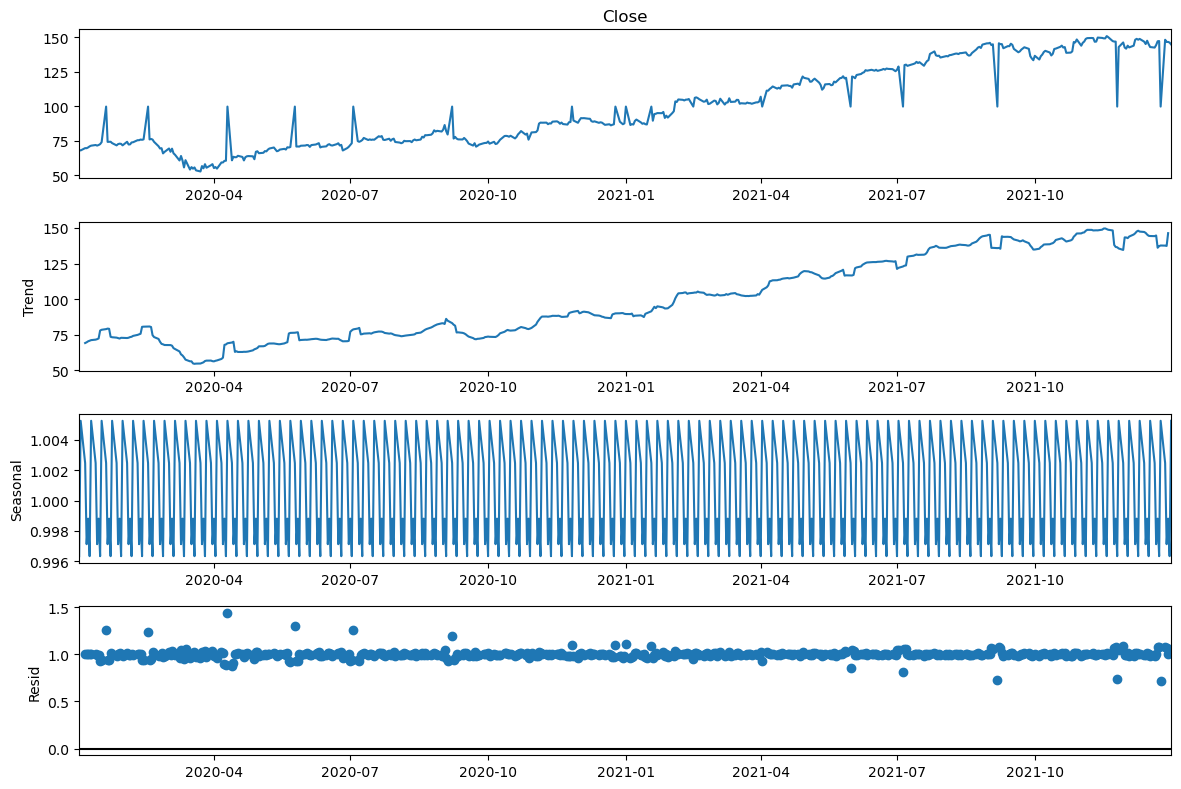

In [13]:
# Multiplicativa
s_dec_multiplicative = seasonal_decompose(data.Close, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [14]:
original_trace = go.Scatter(x=data.index, y=data['Close'], name='Original')
trend_trace = go.Scatter(x=data.index, y=s_dec_multiplicative.trend, name='Trend (Additive)')
seasonal_trace = go.Scatter(x=data.index, y=s_dec_multiplicative.seasonal, name='Seasonal (Additive)')
residual_trace = go.Scatter(x=data.index, y=s_dec_multiplicative.resid, name='Residual (Additive)')

plots = [original_trace, trend_trace, seasonal_trace, residual_trace]

fig = make_subplots(rows=4, cols=1, subplot_titles=("Original", "Trend (Additive)", "Seasonal (Additive)", "Residual (Additive)"))

# Add traces to the subplot
fig.add_trace(original_trace, row=1, col=1)
fig.add_trace(trend_trace, row=2, col=1)
fig.add_trace(seasonal_trace, row=3, col=1)
fig.add_trace(residual_trace, row=4, col=1)

# Update the layout of the subplot
fig.update_layout(title_text='Seasonal Decomposition - Multiplicative Model', showlegend=True)

# Show the interactive Plotly plot
fig.show()

In [ ]:
""" ESCRIBA AQUI SU INTERPRETACION DE LOS GRAFICOS=

De los gráficos podemos comentar que de la descomposición de la serie, vemos una fuerte componente de estacionalidad y es no estacionaria. Conforme pasa el tiempo, ambos la media y la varianza
varian a lo largo del tiempo. La evidencia de estacionalidad, por tanto, intrisicamente reflejan la no estacionaridad del proceso.

Los resiudos muestran que la serie presenta una estacionalidad multiplicativa mas que aditiva ya que los residuos son mayores al principio y al final de la serie.

La serie corresponde con un proceso Ar(1) o Random Walk

"""

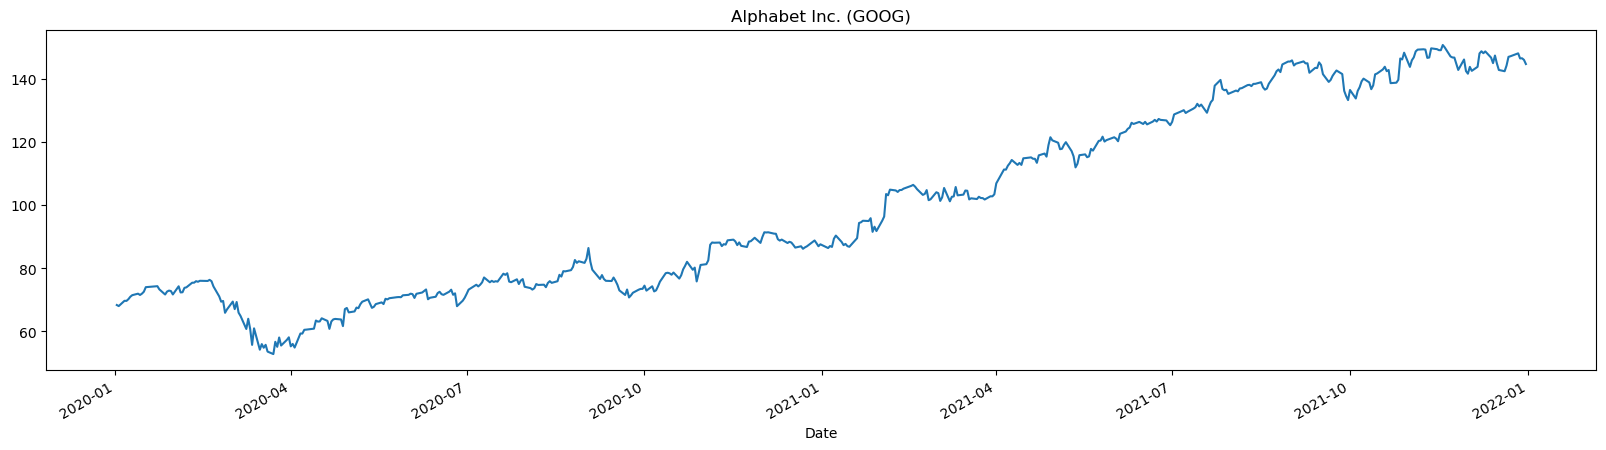

In [23]:
data.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 2=** Analice las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [15]:
""" ESCRIBA AQUI SU RESPUESTA=

En dicho gráfico podemos observar el aumento de la media y varianza a lo largo del tiempo, corresponde con un proceso Ar(1) -> Random Walk (caminta aleatoria)

"""

' ESCRIBA AQUI SU RESPUESTA=\n\nEn dicho gráfico podemos observar el aumento de la media y varianza a lo largo del tiempo, corresponde con un proceso Ar(1) -> Random Walk (caminta aleatoria)\n\n'

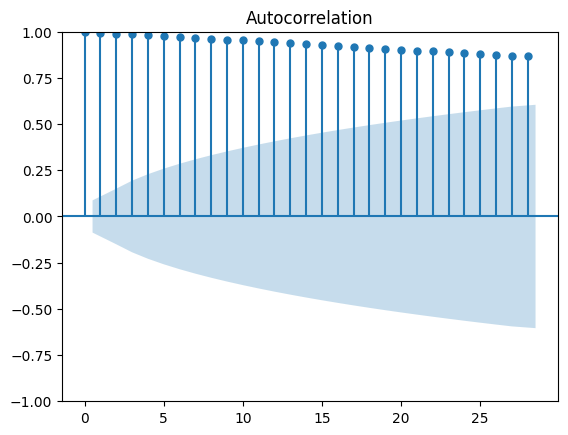

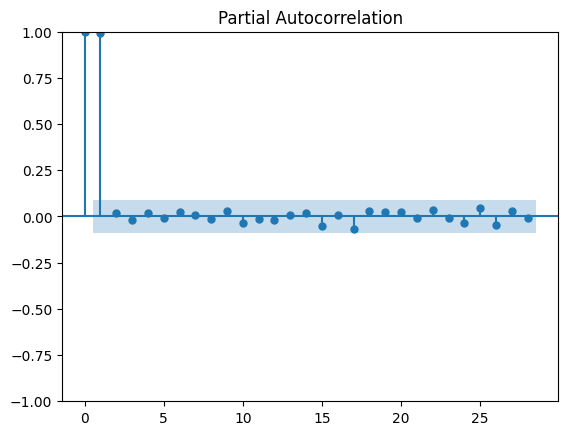

In [ ]:
plot_acf(data['Close']);
plot_pacf(data['Close']);

**Ejercicio 3=** ¿Cuáles son los atributos fundamentales de una serie estacionaria? A través de cuál de los dos gráficos podríamos evaluar si existe una aproximación a la estacionariedad o no estacionariedad. Además, ¿cuál es la interpretación que se puede hacer del otro gráfico?

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=

Los atributos fundamentales de una serie estacionaria son:
1. Media constante: la media de la serie no varía significativamente a lo largo del tiempo.
2. Varianza constante: la varianza de la serie también permanece constante en todos los periodos.
3. Autocorrelación constante: que mide la relación entre los valores de la serie en diferentes intervalos de tiempo, no cambia.

ACF (Función de autocorrelación)
La serie de tiempo no es estacionaria. El gráfico de ACF no muestra autocorrelaciones que se mantienen cerca de cero para la mayoría de los lags.

PACF (Función de autocorrelación parcial)
Dado que la autocorrelación es fuerte en el lag 0 y 1 y lo siguiente caen dentro de la banda de confianza, podría indicar que un modelo autoregresivo de orden 1 Ar(1)
es el mas apropiado para dicha serie de tiempo. Confirmamos que se trata de un Random Walk.

"""

In [16]:
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)

In [17]:
data_diff.drop(['2020-01-02'], inplace=True)

c:\Users\ferna\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



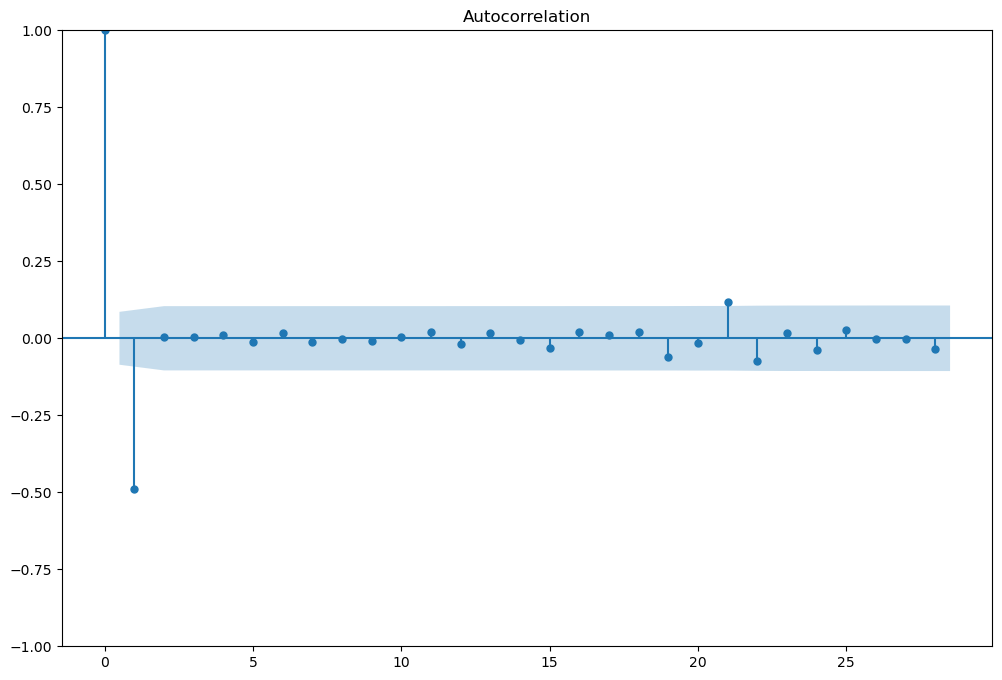

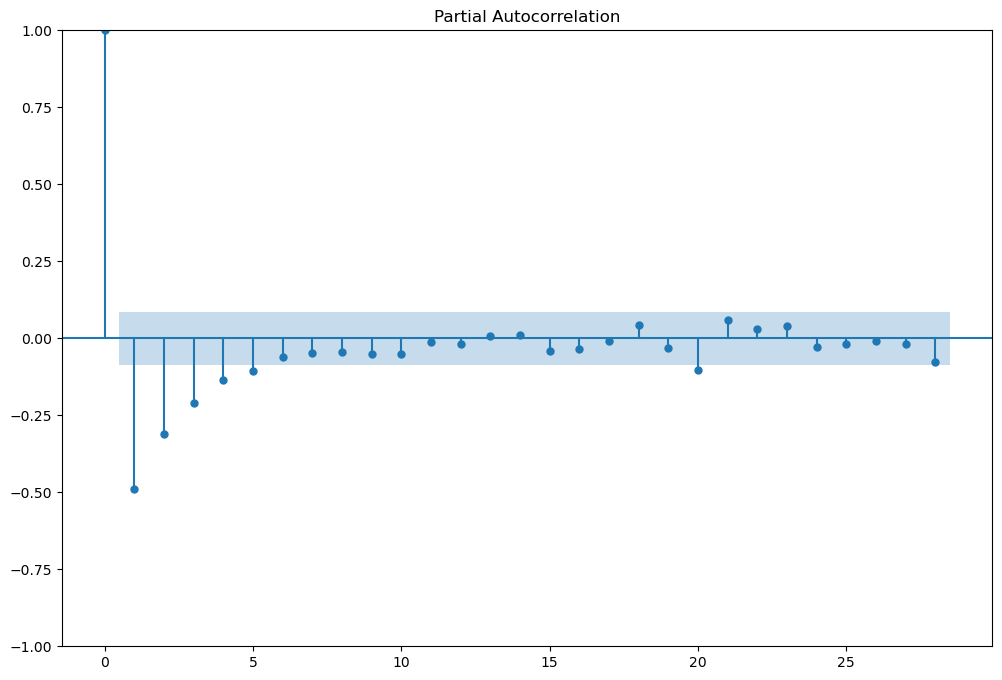

In [18]:
plot_acf(data_diff['Close']);
plot_pacf(data_diff['Close']);

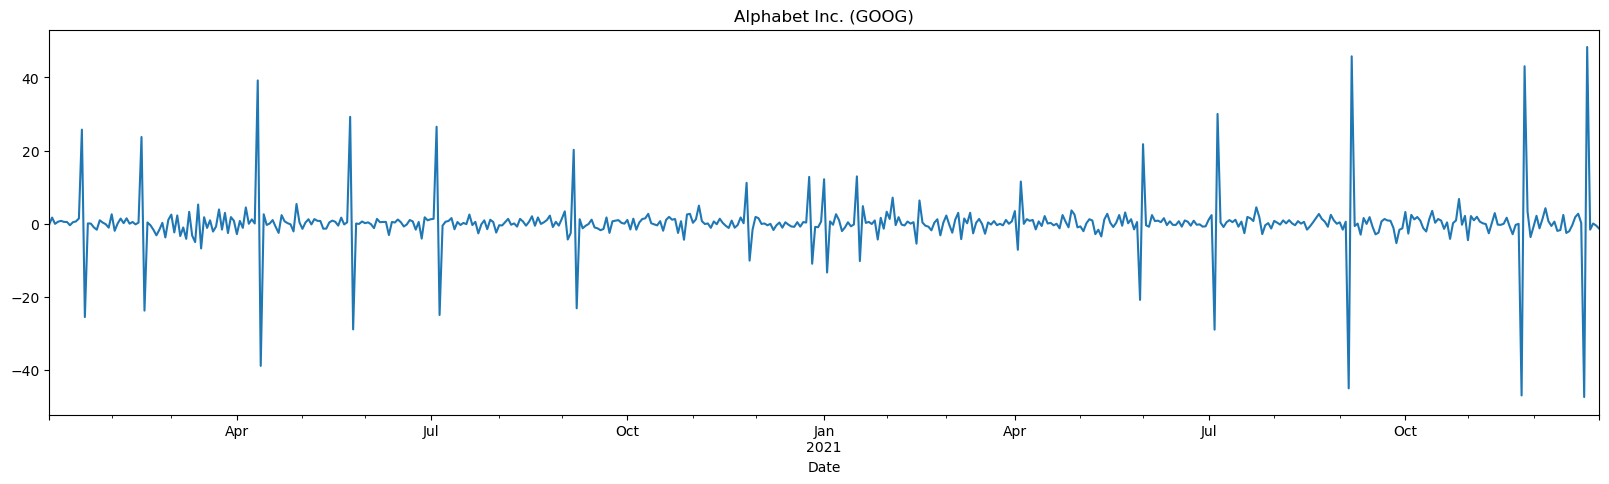

In [19]:
data_diff.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 4=** Analice nuevamente las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA =

1. Media constante: los valores oscilan entre picos y el cero.
2. Varianza constante: los valores no cambian drásticamente a lo largo del tiempo.
3. Ausencia de autocorrelación: se observa en el gráfico de ACF y PACF, la autocorrelación (excepto en el mismo periódo -> lag 0) es nula.

Por estos motivos, podemos concluir que se trata de un proceso de ruido blanco.

"""

<!DOCTYPE html>
<html>
<head>
</head>
<body font size="6">
    <h1>Ejercicio 5= Para finalizar, contestar estas tres preguntas en el espacio asignado a continuacion </h1>
    <ul>
        <li>
            <h2>Pregunta 5-A) Segun el libro de Daniel Peña, ¿cuál es la característica principal que se desprende al observar una serie de tiempo? </h2>
        </li>
            <h2></h2>
            <h2></h2>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-A =

Según Daniel Peña, al observar una serie de tiempo podemos determinar las siguientes características:

1. Si las series oscilan alrededor constante, son estables o estacionarias
2. Si las series no se mantienen en un nivel constante, decimos que son no estacionarias.
3. Además, de tener un nivel fijo o variable en el tiempo, podemos determinar si tienen un comportamiento superpuesto que se repite a
lo largo del tiempo, es decir, si son o no estacionales.

"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-B) Mencione las principales diferencias entre la estacionaridad estricta y la debil</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-B =

Estacionaridad estricta (o fuerte):
- En un proceso de estacionaridad estricta, las propiedades estadísticas de la serie de tiempo son constantes a lo largo del tiempo.
- Esto significa que la media, la varianza y las covarianzas entre las observaciones no cambian con el tiempo.
- En un proceso de estacionaridad estricta, no hay tendencia, estacionalidad u otros patrones sistemáticos en los datos. La serie de tiempo es completamente aleatoria y
se comporta de manera constante en términos estadísticos.

Estacionaridad débil (o débil):
- En un proceso de estacionaridad débil, no se requiere que las propiedades estadísticas sean constantes en el tiempo, pero se mantienen constantes en términos de promedios, varianzas y autocorrelaciones.
- Esto significa que la serie de tiempo puede tener una tendencia o estacionalidad, pero estas propiedades no deben cambiar de manera sistemática con el tiempo.
- En un proceso de estacionaridad débil, las diferencias entre los valores sucesivos (lag 1) deben ser estacionarias en el sentido estricto. Esto se conoce como una serie de tiempo
integrada de orden 1, o I(1).

"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-C) Al examinar los modelos autoregresivos, es deseable que las series temporales sean estacionarias. ¿Cuáles son los problemas más comunes que pueden evitar que las series temporales cumplan con esta estacionariedad?.</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-C =

1. Tendencia: La presencia de una tendencia hace que la serie no sea estacionaria en términos de media.

2. Estacionalidad: La presencia de estacionalidad hace que la serie no sea estacionaria en términos de varianza y covarianza.

3. Heterocedasticidad: La heterocedasticidad puede hacer que la serie no sea estacionaria en términos de varianza.

4. Ciclos: La presencia de ciclos puede dificultar que la serie sea estacionaria en términos de media y varianza.

5. Raíz unitaria: Una serie de tiempo con una raíz unitaria significa que no es estacionaria en su forma original. 
    Esto puede requerir diferenciación (por ejemplo, diferenciación de primer orden) para convertirla en una serie estacionaria.
    
6. Eventos atípicos o outliers: Valores extremos o inusuales en la serie pueden distorsionar las propiedades estadísticas y hacer que no sea estacionaria.

7. Cambios estructurales: Cambios en la estructura de la serie temporal, como cambios en la política económica, eventos catastróficos, cambios en la competencia del mercado, etc., pueden afectar la estacionariedad.

"""

<b><font size="5"> "FIN DEL EJERCICIO ASINCRONICO" - Muchas gracias! </b>